In [ ]:
# Installing packages needed.
#emoji - Python package for print and use of emojis
#vaderSentiment - Sentiment analysis tool.
#google-api-python-client - Used for interacting with google services and API.

In [ ]:
! pip install emoji
! pip install vaderSentiment
! pip install google-api-python-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
#Installation of more packages.
#googleapiclient.discovery - For filtering comments.
#re - For filtering comments with just emojis
#matplotlib - For visualization.
from googleapiclient.discovery import build
import re
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
# Extracting comments.

API_KEY = 'AIzaSy.......................'


youtube = build('youtube', 'v3', developerKey=API_KEY)

video_id = input('https://www.youtube.com/watch?v=M_X8Whrzoms: ')[-11:]
print("video id: " + video_id)

video_response = youtube.videos().list(
	part='snippet',
	id=video_id
).execute()

video_snippet = video_response['items'][0]['snippet']
uploader_channel_id = video_snippet['channelId']
print("channel id: " + uploader_channel_id)


https://www.youtube.com/watch?v=M_X8Whrzoms: M_X8Whrzoms
video id: M_X8Whrzoms
channel id: UCxVoBlRQHWr-GKiAH0zMSCg


In [ ]:
print("Fetching Comments...")
comments = []
nextPageToken = None
while len(comments) < 3000:
	request = youtube.commentThreads().list(
		part='snippet',
		videoId=video_id,
		maxResults=100,
		pageToken=nextPageToken
	)
	response = request.execute()
	for item in response['items']:
		comment = item['snippet']['topLevelComment']['snippet']
		if comment['authorChannelId']['value'] != uploader_channel_id:
			comments.append(comment['textDisplay'])
	nextPageToken = response.get('nextPageToken')

	if not nextPageToken:
		break
comments[:5]


Fetching Comments...


['Smart call hun, cause if u couldn&#39;t take her jabs, u sure dont wanna see no upper cut or over hand,Lordy Lordy',
 'Gotta love how everyone immediately jumped on the &quot;she must be trans&quot; bandwagon with literally no proof. We don&#39;t have enough eggs for all the faces that whined about her in this comment section.',
 'Yall spreading misinformation... disgusting',
 'She is a born female....she is not a born man',
 'Wrong ring']

In [ ]:
#Flitering for quality comments using #Re without emojis and hyperlinks.
hyperlink_pattern = re.compile(
	r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

threshold_ratio = 0.65

relevant_comments = []

for comment_text in comments:

	comment_text = comment_text.lower().strip()

	emojis = emoji.emoji_count(comment_text)

	text_characters = len(re.sub(r'\s', '', comment_text))

	if (any(char.isalnum() for char in comment_text)) and not hyperlink_pattern.search(comment_text):
		if emojis == 0 or (text_characters / (text_characters + emojis)) > threshold_ratio:
			relevant_comments.append(comment_text)

relevant_comments[:5]


['smart call hun, cause if u couldn&#39;t take her jabs, u sure dont wanna see no upper cut or over hand,lordy lordy',
 'gotta love how everyone immediately jumped on the &quot;she must be trans&quot; bandwagon with literally no proof. we don&#39;t have enough eggs for all the faces that whined about her in this comment section.',
 'yall spreading misinformation... disgusting',
 'she is a born female....she is not a born man',
 'wrong ring']

In [ ]:
# Saving comments in a text file.
f = open("ytcomments.txt", 'w', encoding='utf-8')
for idx, comment in enumerate(relevant_comments):
	f.write(str(comment)+"\n")
f.close()
print("Comments stored successfully!")

Comments stored successfully!


In [ ]:
# Analyzing the sentiments of the comments

def sentiment_scores(comment, polarity):

	# Creating a SentimentIntensityAnalyzer object.
	sentiment_object = SentimentIntensityAnalyzer()

	sentiment_dict = sentiment_object.polarity_scores(comment)
	polarity.append(sentiment_dict['compound'])

	return polarity


polarity = []
positive_comments = []
negative_comments = []
neutral_comments = []

f = open("ytcomments.txt", 'r', encoding='`utf-8')
comments = f.readlines()
f.close()
print("Analysing Comments...")
for index, items in enumerate(comments):
	polarity = sentiment_scores(items, polarity)

	if polarity[-1] > 0.05:
		positive_comments.append(items)
	elif polarity[-1] < -0.05:
		negative_comments.append(items)
	else:
		neutral_comments.append(items)

# Print polarity
polarity[:5]


Analysing Comments...


[0.7719, 0.2732, -0.6908, 0.0, -0.4767]

In [ ]:
avg_polarity = sum(polarity)/len(polarity)
print("Average Polarity:", avg_polarity)
if avg_polarity > 0.05:
	print("Positive response")
elif avg_polarity < -0.05:
	print("Negative response")
else:
	print("Neutral response")

print("The comment with the most positive sentiment:", comments[polarity.index(max(
	polarity))], "with score", max(polarity), "and length", len(comments[polarity.index(max(polarity))]))
print("The comment with the most negative sentiment:", comments[polarity.index(min(
	polarity))], "with score", min(polarity), "and length", len(comments[polarity.index(min(polarity))]))


Average Polarity: -0.20605886190648767
Negative response
The comment with the most positive sentiment: nature &amp; peris olympic in parrelal universe😁😁 😁😁😊😊☺😀😃😄😄😁😁🙏🙏
 with score 0.9928 and length 64
The comment with the most negative sentiment: i don&#39;t use slang words; but if a biological man who cannot compete with male boxers; should get the hell out of boxing. if i were a female boxer who had to deal with this abuse; i would sue somebody for everything i couild get. and i have never sued anyone in my life. this is a world wide joke and a total unfair shame to athletes who have trained so incredably hard to get the crap beat out of them unfairly.
 with score -0.9821 and length 416


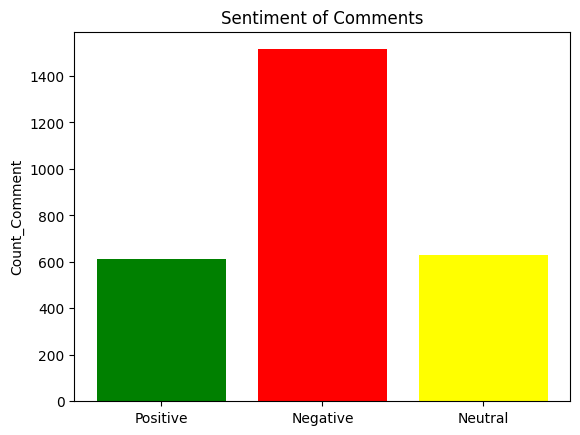

In [ ]:
positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

# labels and data for Bar chart
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

# Creating bar chart
plt.bar(labels, comment_counts, color=['green', 'red', 'yellow'])

# Adding labels and title to the plot
plt.ylabel('Count_Comment')
plt.title('Sentiment of Comments')


# Displaying the chart
plt.show()
